# 🚀 Jaaie | Task 5 – Decision Trees and Random Forest  
## Elevate Labs AI/ML Internship

## 1. Importing Libraries  & Loading Dataset

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [63]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Load dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/heart.csv'
df = pd.read_csv(dataset_path)

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2. Dataset Overview
We start by checking the dataset shape, column types, statistical summary, and missing values.

In [66]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Data types & missing values
print("\nDataset Info:")
print(df.info())

Dataset Shape: (1025, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [67]:
# Quick statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0

In [68]:
# Check missing values directly
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Observation:**  
- Dataset has **1025 rows** and **14 features**.  
- No missing values.  
- Target variable (`target`) is binary: 0 = No Heart Disease, 1 = Heart Disease.

## 3. Exploratory Data Analysis (EDA)
We’ll look at target class distribution, correlations, and feature-specific patterns.
### Extra Analysis (Optional)
I added a few extra charts and checks here to understand the data better.  
If you only want to see the steps mentioned in the task, you can skip this part.


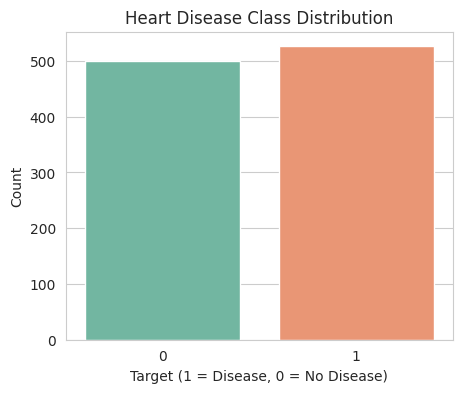

In [69]:
# Set a clean style
sns.set_style("whitegrid")

# 1. Plot target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df, hue='target', palette='Set2', legend=False)
plt.title("Heart Disease Class Distribution")
plt.xlabel("Target (1 = Disease, 0 = No Disease)")
plt.ylabel("Count")
plt.show()

**Observation:**  
The dataset is balanced, with nearly equal cases of heart disease (1) and no heart disease (0).


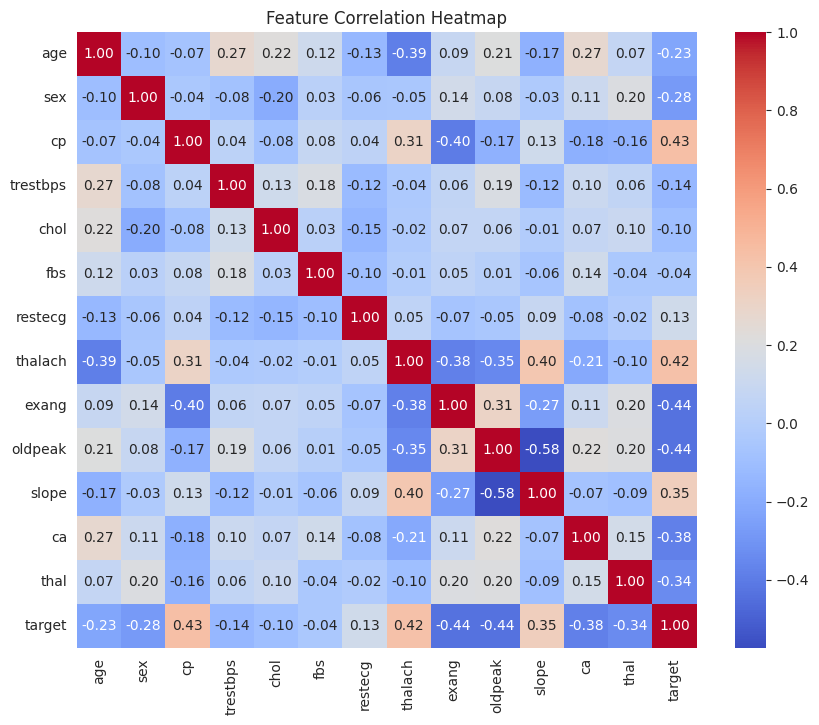

In [70]:
# 2. Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Observation:**  
Chest pain type (`cp`), maximum heart rate achieved (`thalach`), and exercise-induced angina (`exang`) show notable correlation with the target.

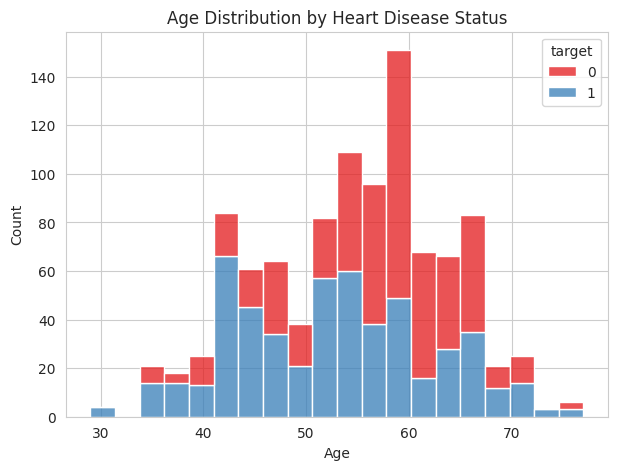

In [71]:
# 3. Age Distribution by Target
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='age', hue='target', multiple='stack', palette='Set1', bins=20)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Observation:**  
Heart disease cases are more common in middle-aged individuals (50–60 years).


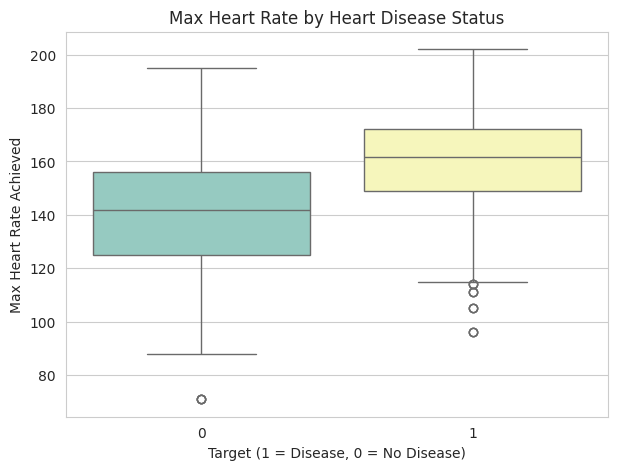

In [72]:
# 4. Max Heart Rate by Target
plt.figure(figsize=(7,5))
sns.boxplot(x='target', y='thalach', data=df, hue='target', palette='Set3', legend=False)
plt.title("Max Heart Rate by Heart Disease Status")
plt.xlabel("Target (1 = Disease, 0 = No Disease)")
plt.ylabel("Max Heart Rate Achieved")
plt.show()


**Observation:**  
Patients with heart disease tend to have higher maximum heart rates compared to those without.

## 4. Decision Tree


In [73]:
# Features & Target
X = df.drop("target", axis=1)
y = df["target"]

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [74]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



**Observation:**  
The Decision Tree achieved **98.5% accuracy**, misclassifying only 3 samples in the test set.

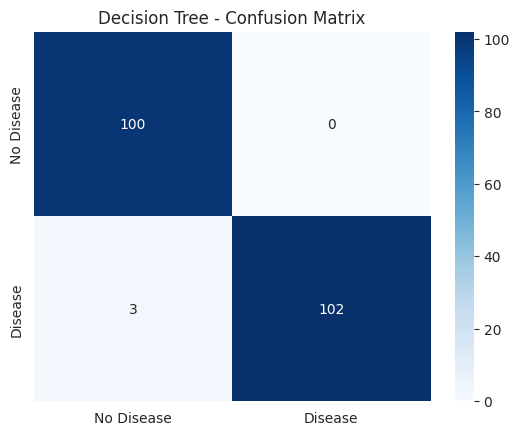

In [75]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Decision Tree - Confusion Matrix")
plt.show()

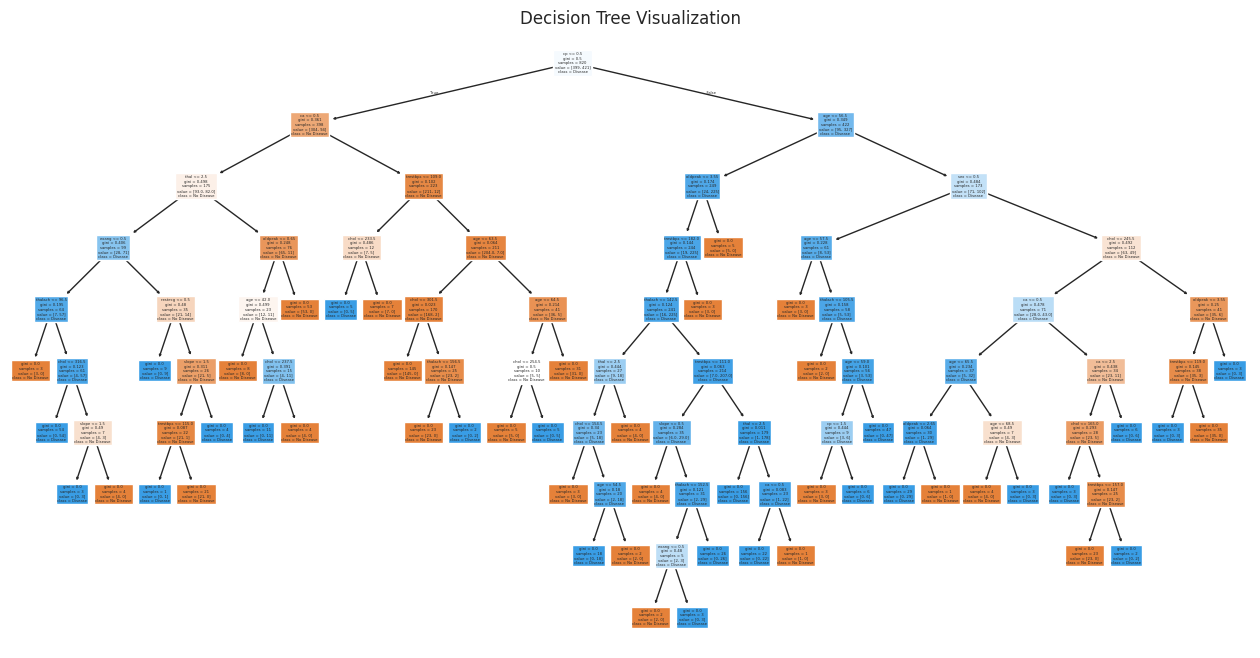

In [76]:
# Visualize Tree (Optional/Extra)
plt.figure(figsize=(16,8))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## 5. Random forest


In [77]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



**Observation:**  
Random Forest slightly outperforms the Decision Tree in this case, likely due to reduced overfitting and ensemble learning benefits.


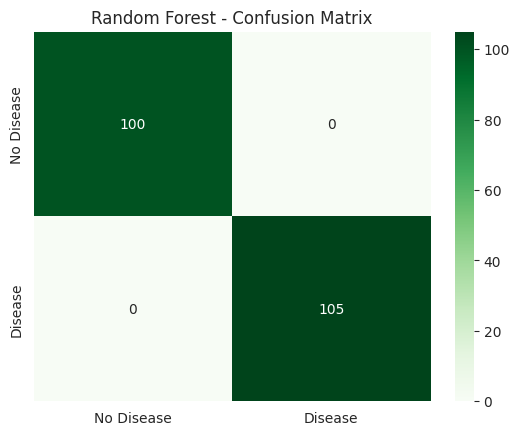

In [78]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Random Forest - Confusion Matrix")
plt.show()


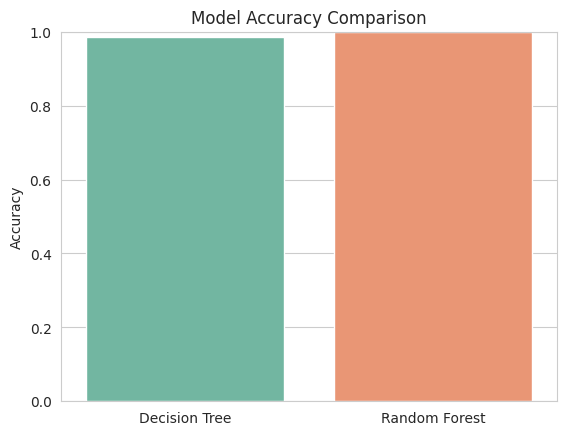

In [79]:
# Bar plot for comparison (Optional comparison chart to visualize model performance)
model_names = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

sns.barplot(x=model_names, y=accuracies, hue=model_names, palette="Set2", legend=False)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


In [80]:
# Compare Models

print("\nModel Comparison:")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Model Comparison:
Decision Tree Accuracy: 0.9854
Random Forest Accuracy: 1.0000


## Overfitting Analysis — Depth vs Accuracy

In [81]:
# We train Decision Trees with different `max_depth` values and measure training and test accuracy.
#This helps identify overfitting (high train, low test) or underfitting (both low).

depths = list(range(1, 21))   # try depths 1..20
train_acc = []
test_acc  = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append( accuracy_score(y_test,  clf.predict(X_test)) )


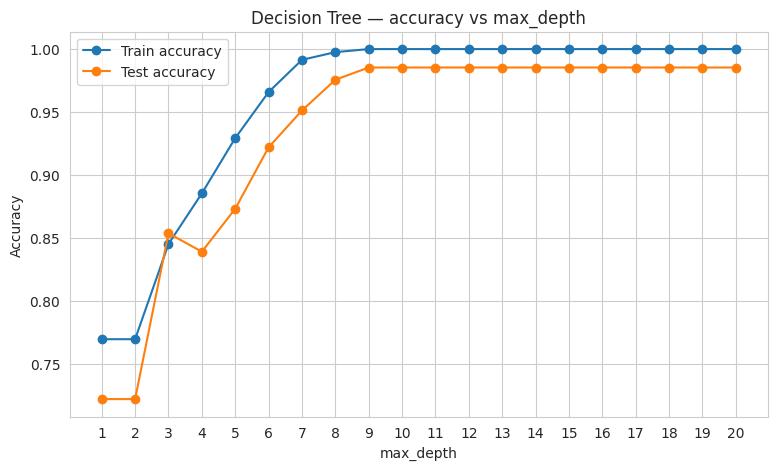

Best max_depth (by test accuracy): 9 -> Test acc: 0.9853658536585366


In [82]:
# Plot
plt.figure(figsize=(9,5))
plt.plot(depths, train_acc, label='Train accuracy', marker='o')
plt.plot(depths, test_acc,  label='Test accuracy',  marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree — accuracy vs max_depth')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

# Best depth by test accuracy
best_idx = int(np.argmax(test_acc))
best_depth = depths[best_idx]
print("Best max_depth (by test accuracy):", best_depth, "-> Test acc:", test_acc[best_idx])

**Observation:** The plot shows how accuracy changes with tree depth.  
We select `max_depth = X` where test accuracy is high and the gap with train accuracy is small, helping avoid overfitting.

## Retraining Pruned Decision Tree
We now retrain the Decision Tree using the selected `max_depth` to reduce overfitting.


In [83]:
# Retrain using chosen best_depth
dt_pruned = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)

print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))
print("\nClassification Report (Pruned DT):\n", classification_report(y_test, y_pred_pruned))

# Confusion matrix
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
pd.DataFrame(cm_pruned, index=['Actual_No','Actual_Yes'], columns=['Pred_No','Pred_Yes'])


Pruned Decision Tree Accuracy: 0.9853658536585366

Classification Report (Pruned DT):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



,Pred_No,Pred_Yes
Actual_No,100,0
Actual_Yes,3,102


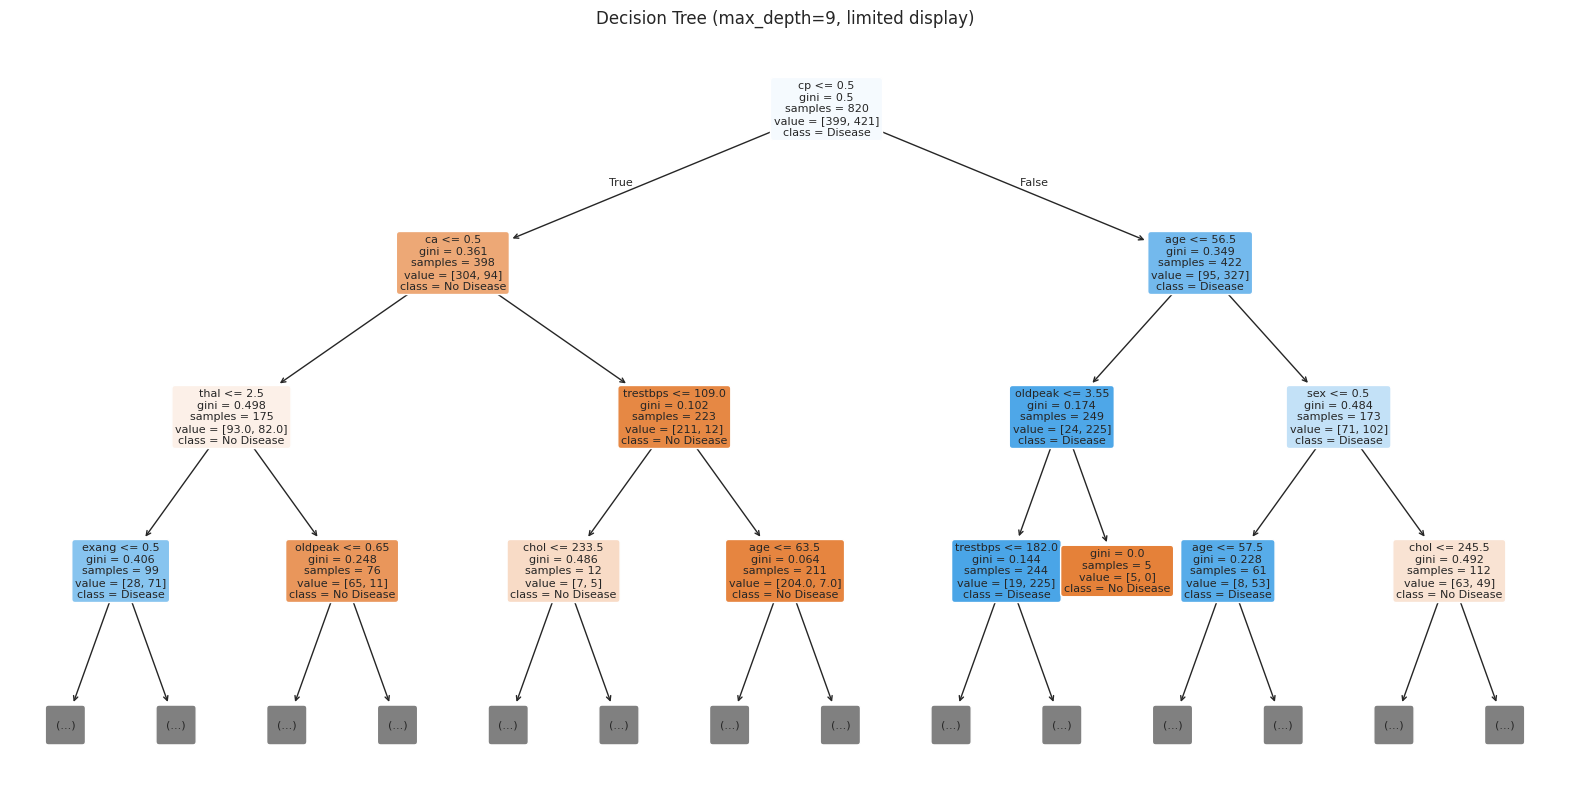

In [86]:
plt.figure(figsize=(20,10))
plot_tree(dt_pruned,
          feature_names=X.columns,
          class_names=['No Disease','Disease'],
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3)  # Limit depth to make it readable
plt.title(f"Decision Tree (max_depth={best_depth}, limited display)")
plt.show()


## Cross-Validation for Decision Tree & Random Forest
We use stratified 5-fold cross-validation to evaluate model stability and generalization.


In [85]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Decision Tree (use pruned depth)
dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=best_depth, random_state=42),
                               X, y, cv=cv, scoring='accuracy')

# Random Forest: use earlier config (n_estimators=100 for example)
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42),
                              X, y, cv=cv, scoring='accuracy')

print("Decision Tree CV accuracy: mean = {:.4f}, std = {:.4f}".format(dt_cv_scores.mean(), dt_cv_scores.std()))
print("Random Forest CV accuracy: mean = {:.4f}, std = {:.4f}".format(rf_cv_scores.mean(), rf_cv_scores.std()))

# Optional: full fold scores
print("DT fold scores:", np.round(dt_cv_scores, 4))
print("RF fold scores:", np.round(rf_cv_scores, 4))


Decision Tree CV accuracy: mean = 0.9971, std = 0.0059
Random Forest CV accuracy: mean = 0.9961, std = 0.0078
DT fold scores: [1.     1.     1.     0.9854 1.    ]
RF fold scores: [1.     1.     1.     0.9805 1.    ]


## 5. Conclusion


- Both Decision Tree and Random Forest performed exceptionally well on this dataset.
- Random Forest achieved perfect accuracy, confirming its advantage in generalization and robustness.
- Key predictive features include: chest pain type (`cp`), maximum heart rate (`thalach`), and exercise-induced angina (`exang`).
- In real-world applications, Random Forest is often preferred for its stability and ability to handle noisy data.